In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import keras.backend as K

<ErrorbarContainer object of 3 artists>

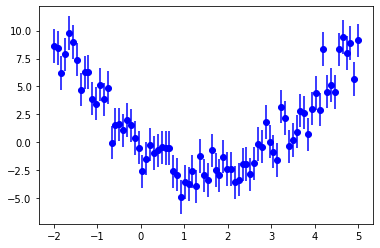

In [6]:
def func(x):
    return x**2-3*x


sig = 1.5
n_obs = 80
eps = np.random.normal(0.,sig,n_obs)
x_obs = np.linspace(-2,5,n_obs)
fun_obs = func(x_obs) + eps
dfun_obs = sig

plt.errorbar(x_obs,fun_obs,yerr=dfun_obs,fmt="bo")

In [38]:
model = Sequential()
model.add(Dense(5,activation='selu'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(10,activation='selu'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(5,activation='selu'))
model.add(Dense(1))

loss_fn = tf.keras.losses.mean_squared_error
model.compile(optimizer='Adam',loss=loss_fn)

hist = model.fit(x=x_obs.reshape(-1,1),y=fun_obs.reshape(-1,1),epochs=800,verbose=0)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 5)                 10        
                                                                 
 dense_33 (Dense)            (None, 10)                60        
                                                                 
 dense_34 (Dense)            (None, 5)                 55        
                                                                 
 dense_35 (Dense)            (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


best loss = 1.6562868356704712


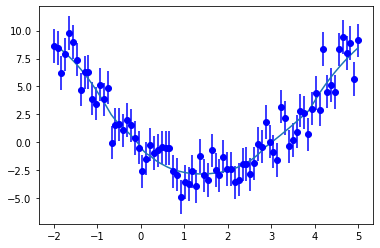

In [39]:
print(f"best loss = {hist.history['loss'][-1]}")

x_test = np.linspace(-2,5,250)
y_test = model(x_test.reshape(-1,1))

plt.errorbar(x_obs,fun_obs,yerr=dfun_obs,fmt="bo")
plt.plot(x_test,y_test)

In [41]:
y_pred_obs = model(x_obs.reshape(-1,1))
x = y_pred_obs[:,0] - fun_obs
sum(x**2)/n_obs

<tf.Tensor: shape=(), dtype=float32, numpy=1.6558262>

In [30]:
# custom loss function
class_weights = K.variable([[sig for i in range(len(x_obs))]]) 
class_weights = K.reshape(class_weights, (80, 1))

def loss_fixed(y_true, y_pred):

    mse = K.mean(K.square( (y_pred - y_true)/class_weights ), axis=-1)
        # print('mse:', K.int_shape(mse))
    return mse
      

In [35]:
model = Sequential()
model.add(Dense(5,activation='selu'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(10,activation='selu'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(5,activation='selu'))
model.add(Dense(1))

loss_fn = tf.keras.losses.mean_squared_error
model.compile(optimizer='Adam',loss=loss_fixed)

hist = model.fit(x=x_obs.reshape(-1,1),y=fun_obs.reshape(-1,1),batch_size=80,epochs=500,verbose=0)

best loss = 0.8898504376411438


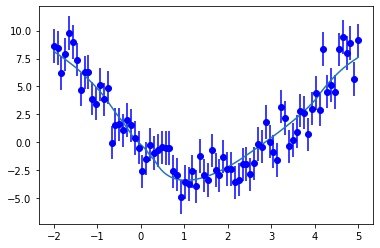

In [36]:
print(f"best loss = {hist.history['loss'][-1]}")

x_test = np.linspace(-2,5,250)
y_test = model(x_test.reshape(-1,1))

plt.errorbar(x_obs,fun_obs,yerr=dfun_obs,fmt="bo")
plt.plot(x_test,y_test)

In [37]:
y_pred_obs = model(x_obs.reshape(-1,1))
x = (y_pred_obs[:,0] - fun_obs)/sig
sum(x**2)/n_obs

<tf.Tensor: shape=(), dtype=float32, numpy=0.8889815>